# Q1

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
import warnings
from rich.progress import track
warnings.filterwarnings('ignore')

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
data = pd.read_csv('Problem1_DataSet.csv')
data.rename(columns={"Month": "time", "Miles, in Millions": "measurement"},inplace = True)
data

,time,measurement
0,Jan-1964,7.269
1,Feb-1964,6.775
2,Mar-1964,7.819
3,Apr-1964,8.371
4,May-1964,9.069
...,...,...
79,Aug-1970,14.057
80,Sep-1970,16.234
81,Oct-1970,12.389
82,Nov-1970,11.594


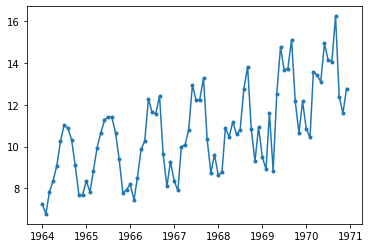

In [3]:
data['time'] = pd.to_datetime(data['time'])
plt.plot(data['time'],data["measurement"], '.-')

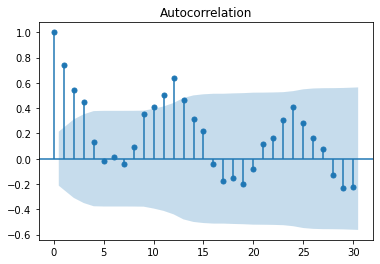

In [4]:
plot_acf(data["measurement"], lags = 30)
plt.show()

**The seasonal period is 12 since the ACF reaches a local maximum every 12 lags.**

In [5]:
def ma(N, lst2):
    return_list2=[]
    for i in range(0, len(lst2)):
        sum_n = 0
        if i<(N-1):
            return_list2.append(None)
        else:
            for n in range(i, i-N, -1):
                sum_n += lst2[n]
            avg = sum_n/N
            return_list2.append(avg)
    return return_list2

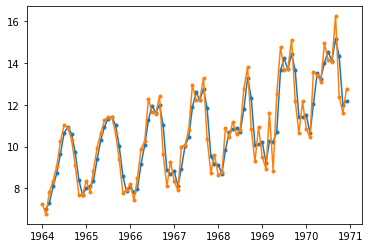

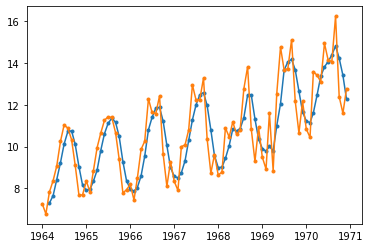

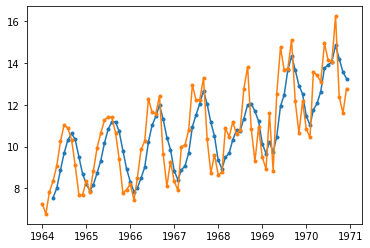

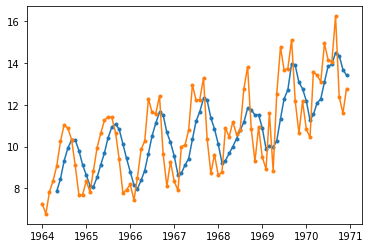

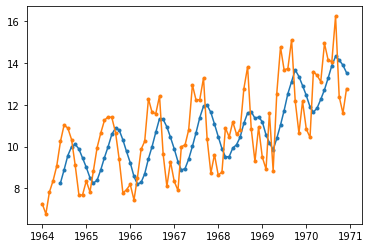

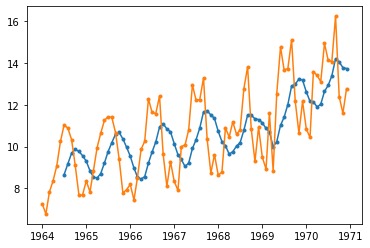

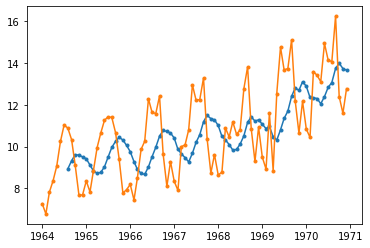

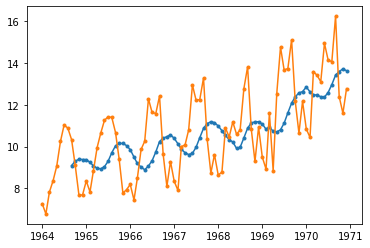

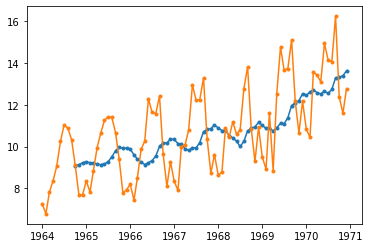

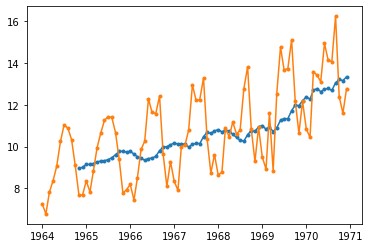

In [6]:
Measurment = list(data['measurement'])
for i in range(2,12):
    Measurment_new = ma(i, Measurment)
    data['Moving_Avg'] = Measurment_new
    plt.figure(figsize=(6,4))
    plt.plot(data['time'],data['Moving_Avg'], '.-', label='Moving Average')
    plt.plot(data['time'],data['measurement'], '.-', label='Measurement')

**We should choose window size = 6 when smoothing the data because it seems to best capture the trend and seasonality of the data. When removing seasonality, we should choose window size = 12 because the seasonal period is 12.**

**The trend is incresing.**

In [7]:
data_diff = data.measurement.diff()
data_diff = data_diff.iloc[1:]

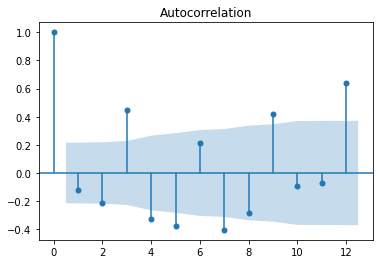

In [8]:
plot_acf(data_diff, lags = 12)
plt.show()

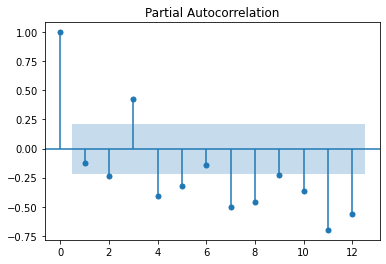

In [9]:
plot_pacf(data_diff, lags = 12)
plt.show()

**There is no significant cut-off in both ACF and PACF.**

In [10]:
first_seasonal_diff = data['measurement'].diff(12)
first_seasonal_diff = first_seasonal_diff.iloc[12:]

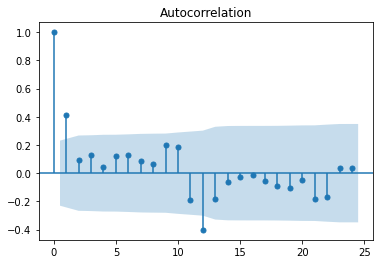

In [11]:
plot_acf(first_seasonal_diff, lags = 24)
plt.show()

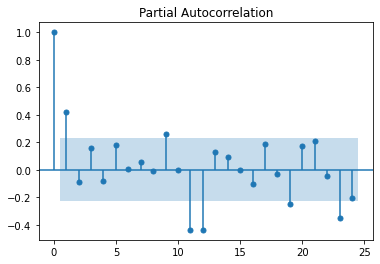

In [12]:
plot_pacf(first_seasonal_diff, lags = 24)
plt.show()

**There is a significant cut-off in both ACF and PACF plot after the first lag.**

In [13]:
VIyears = data[:72].set_index('time')
VIyears

,measurement,Moving_Avg
time,,
1964-01-01,7.269,NaN
1964-02-01,6.775,NaN
1964-03-01,7.819,NaN
1964-04-01,8.371,NaN
1964-05-01,9.069,NaN
...,...,...
1969-08-01,13.731,11.330455
1969-09-01,15.110,11.717091
1969-10-01,12.185,11.980273


In [14]:
pl=[0,1,2,3]
dl=[1]
ql=[0,1,2,3]
Pl=[0,1,2,3]
Dl=[1]
Ql=[0,1,2,3]
low_pdqPDQ_aic = None
low_pdqPDQ_bic = None
low_bic = None
low_aic = None
loop_val = [pl, dl, ql, Pl, Dl, Ql]
for i in track(product(*loop_val)):
    try:
        sarimax = SARIMAX(VIyears['measurement'], order=(i[0], i[1], i[2]), seasonal_order=(i[3],i[4], i[5], 12))
        sarimax_fit = sarimax.fit(disp=False)
        if low_aic==None:
            low_aic = sarimax_fit.aic
            low_pdqPDQ_aic = i
        elif low_aic>sarimax_fit.aic:
            low_aic = sarimax_fit.aic
            low_pdqPDQ_aic = i
        if low_bic==None:
            low_bic = sarimax_fit.bic
            low_pdqPDQ_bic = i
        elif low_bic>sarimax_fit.bic:
            low_bic = sarimax_fit.bic
            low_pdqPDQ_bic = i
    except:
        continue

Output()

In [15]:
print([low_pdqPDQ_aic, low_pdqPDQ_bic])

[(2, 1, 3, 1, 1, 0), (0, 1, 2, 0, 1, 0)]


**Generate the model with lowest AIC:**

In [16]:
model=SARIMAX(VIyears['measurement'], order=(2, 1, 3), seasonal_order=(1, 1, 0, 12)).fit(disp=False)

<AxesSubplot:>

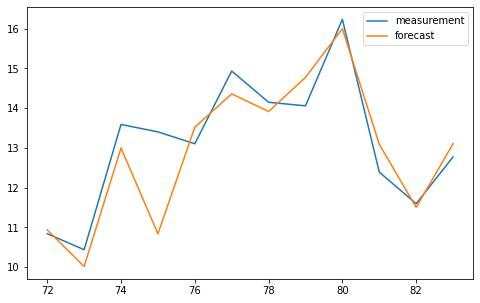

In [17]:
forecast = data[72:84]
forecast['forecast']=list(model.forecast(12))
forecast[['measurement','forecast']].plot(figsize=(8, 5))

**The forecast is close to the original value. However, it is slightly off on 1970-04-01.**

# Q2

In [18]:
data = pd.read_csv('TotalWine.csv')
data.rename(columns={"Time (Quarter)": "time", "TotalWine": "measurement"},inplace = True)

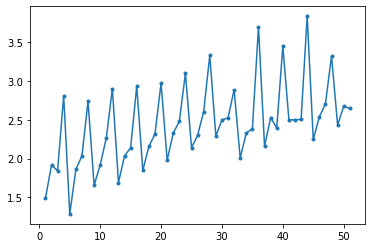

In [19]:
plt.plot(data['time'],data["measurement"], '.-')

**The seasonal period is about 4 lags.**

<AxesSubplot:>

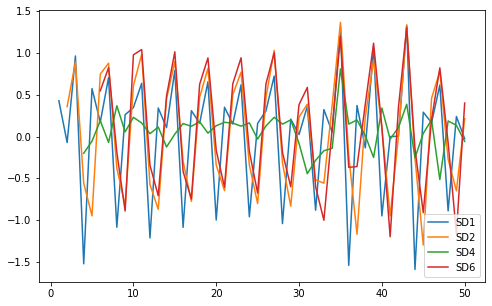

In [20]:
seasonal_diff_1 = data['measurement'].diff()
seasonal_diff_2 = data['measurement'].diff(2)
seasonal_diff_4 = data['measurement'].diff(4)
seasonal_diff_6 = data['measurement'].diff(6)
data['SD1']=seasonal_diff_1
data['SD2']=seasonal_diff_2
data['SD4']=seasonal_diff_4
data['SD6']=seasonal_diff_6
data[['SD1','SD2','SD4','SD6']].plot(figsize=(8, 5))

**Based on the graph, we can see that when difference lag is 4 the differencing best removes seasonality.**

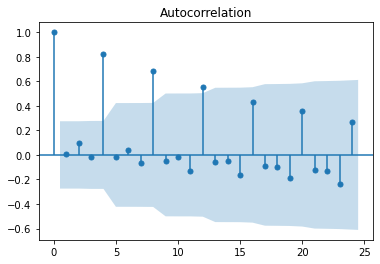

In [21]:
plot_acf(data.measurement, lags = 24).show()

**The seasonal period is 4 lags since a local maximum is reached every 4 lags.**